In [1]:
import matplotlib.pylab as plt
import numpy as npr
from text_model import *
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from metrics import *

e:\课件\2024fall\ENEL 645\Assignment 2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
# Evaluation on loss and accuracy from text model
# All results come from the output of text model in slurm-27981.out
text_loss_accuracy_filename = 'text_model_loss_accuracy.txt'
text_confusion_matrix_filename = 'text_model_confusion_matrix.txt'

In [4]:
# read two files
text_loss_accuracy = pd.read_csv(text_loss_accuracy_filename, header=None, sep=' ',
                                  names=['epoch', 'train_loss', 'train_accuracy', 'epoch2', 'val_loss', 'val_accuracy'])
text_confusion_matrix = np.loadtxt(text_confusion_matrix_filename)

# remove redundant columns and change datatype
text_loss_accuracy.drop('epoch2', axis=1, inplace=True)
text_loss_accuracy['train_accuracy'] = text_loss_accuracy['train_accuracy'].str.rstrip('%').astype('float')
text_loss_accuracy['val_accuracy'] = text_loss_accuracy['val_accuracy'].str.rstrip('%').astype('float')

print(text_loss_accuracy)
print(text_confusion_matrix)

   epoch  train_loss  train_accuracy  val_loss  val_accuracy
0      1      0.4715         82.0980    0.3352       87.7222
1      2      0.2686         90.2745    0.3336       88.5556
2      3      0.2032         92.9804    0.3289       88.6667
3      4      0.1661         94.1863    0.3297       89.6111
4      5      0.1342         95.0882    0.3899       89.4444
5      6      0.1179         95.9804    0.3875       88.7222
6      7      0.1005         96.5588    0.4198       89.0000
7      8      0.0992         96.5294    0.4306       88.8889
8      9      0.0877         96.8235    0.4406       87.9444
9     10      0.0816         96.8824    0.4886       88.8889
[[514. 101.  18.  62.]
 [ 68. 959.  36.  22.]
 [ 36.  23. 732.   8.]
 [ 94.  67.  12. 679.]]


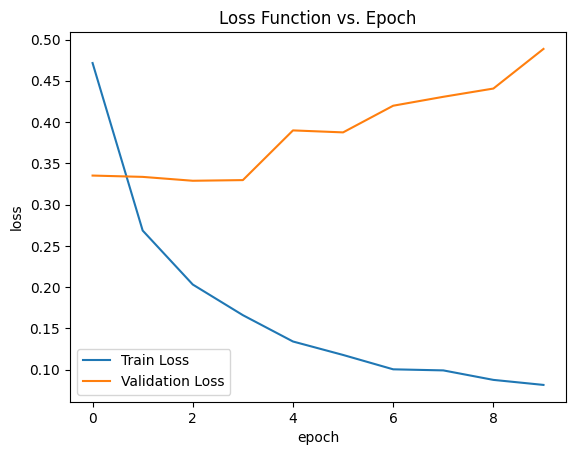

In [5]:
# plot train loss and validation loss
text_train_loss = text_loss_accuracy['train_loss']
text_val_loss = text_loss_accuracy['val_loss']
plot_loss_function(text_train_loss, text_val_loss)

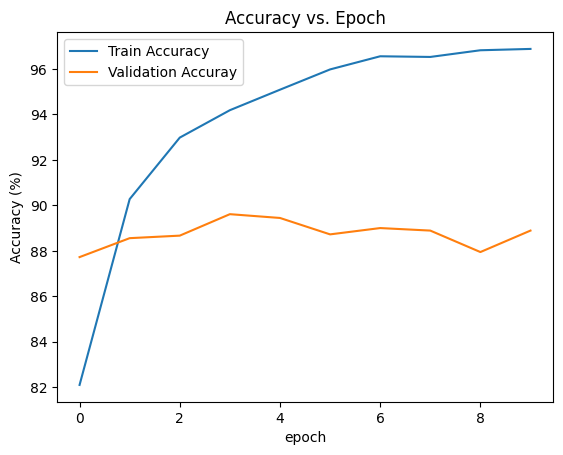

In [6]:
# plot train accuracy and validation accuracy
text_train_acc = text_loss_accuracy['train_accuracy']
text_val_acc = text_loss_accuracy['val_accuracy']
plot_accuracy_function(text_train_acc, text_val_acc)

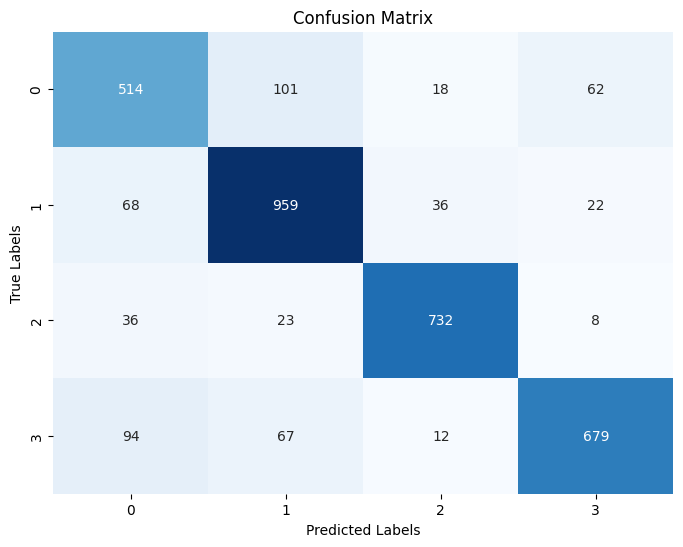

In [7]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(text_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()